### Necessary requirments and libraries

In [ ]:
#pip install -r /home/leilapirhaji/mz_embed_engine/requirements.txt

In [2]:
import os
ml_code_path='/home/leilapirhaji/mz_embed_engine/ml'
os.chdir(ml_code_path)

import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

import importlib
import latent_task_predict_finetune
importlib.reload(latent_task_predict_finetune)
from latent_task_predict_finetune import log_reg_multi_class, ridge_regression_predict

#importing Jonha's funtions 
from models import get_model, Binary_Head, Dummy_Head, MultiClass_Head, MultiHead, Regression_Head, Cox_Head, get_encoder

from viz import generate_latent_space, generate_umap_embedding, generate_pca_embedding

import get_finetune_encoder
importlib.reload(get_finetune_encoder)
from get_finetune_encoder import get_finetune_encoder_from_modelID, get_input_data


ImportError: cannot import name 'ridge_regression_predict' from 'latent_task_predict_finetune' (/home/leilapirhaji/mz_embed_engine/ml/latent_task_predict_finetune.py)

### Importing input datasets

In [34]:

#input data
model_id_list=['']

input_data_location='/home/leilapirhaji/PROCESSED_DATA_2'
finetune_save_dir='/home/leilapirhaji/finetune_models' 

(X_data_train, y_data_train, X_data_val, y_data_val)=get_input_data(input_data_location)


X_data_train.shape, y_data_train.shape, X_data_val.shape, y_data_val.shape


((443, 2736), (443, 58), (149, 2736), (149, 58))

In [21]:
y_data_val.describe(include=['object', 'category'])

,Matt Set Label,Study ID,Cohort Label v0,Column,Polarity,Sex,Subject ID,Region,Race,Treatment,Matt Set,Set,Timepoint,ORR,Benefit,Clinical Trial Phase,IMDC,MSKCC
count,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149,149
unique,1,1,1,1,1,2,149,3,2,2,1,1,1,4,3,1,4,3
top,Val,ST001237,adult_cancer,Hilic,Positive,M,CA209025-44-1009,US/CANADA,WHITE,NIVOLUMAB,Val,Validation,baseline,SD,ICB,RCC3,INTERMEDIATE,INTERMEDIATE
freq,149,149,149,149,149,111,1,63,126,79,149,149,149,70,61,149,82,67


### defining the tasks to predict 

In [35]:
#tasks to predict using encoder
task_list_cat=['Benefit BINARY', 'Nivo Benefit BINARY', 'MSKCC BINARY', 'IMDC BINARY', 'Benefit ORDINAL', 'MSKCC ORDINAL', 'IMDC ORDINAL', 'ORR', 'Benefit', 'IMDC', 'MSKCC', 'Prior_2' ]

#survival tasks
task_list_survival=[ 'OS', 'OS_Event', 'PFS', 'PFS_Event' ]

### getting fine-tune latent sapce

In [181]:

import importlib
import get_finetune_encoder
importlib.reload(get_finetune_encoder)
from get_finetune_encoder import get_finetune_encoder_from_modelID, get_input_data


model_id_real='RCC-35857'
model_neptune_path_real='fine-tune-optuna-RCC-10290-recon-real-modified-loss-Aug29'

model_id_rand='RCC-35899'
model_neptune_path_rand='fine-tune-optuna-RCC-10290-recon-random-modified-loss-Aug29'


#output location:
output_path_real=f'/home/leilapirhaji/finetune_models/{model_id_real}'
os.makedirs(output_path_real, exist_ok=True)

output_path_rand=f'/home/leilapirhaji/finetune_models/{model_id_rand}'
os.makedirs(output_path_rand, exist_ok=True)

#latent space with rand initization
(encoder, Z_train_rand, Z_val_rand, y_data_train, y_data_val)=get_finetune_encoder_from_modelID(model_id_rand, input_data_location, output_path_rand, ml_code_path, model_neptune_path_rand )

#latent space with fine-tuned initization
(encoder, Z_train_real, Z_val_real, y_data_train, y_data_val)=get_finetune_encoder_from_modelID(model_id_real, input_data_location, output_path_rand, ml_code_path, model_neptune_path_real)

Z_train_rand.shape, Z_val_rand.shape, y_data_train.shape, y_data_val.shape, Z_train_real.shape, Z_val_real.shape    

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-35899


Fetching file...: 0 [00:00, ?/s]

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 3 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 3 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-35899/metadata


/home/leilapirhaji/mz_embed_engine/ml/get_finetune_encoder.py:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder_state_dict = torch.load(model_encoder_file, map_locat

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-35857


Fetching file...: 0 [00:00, ?/s]

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-35857/metadata


/home/leilapirhaji/mz_embed_engine/ml/get_finetune_encoder.py:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder_state_dict = torch.load(model_encoder_file, map_locat

((443, 220), (149, 220), (443, 58), (149, 58), (443, 220), (149, 220))

In [186]:
import latent_task_predict_finetune
importlib.reload(latent_task_predict_finetune)
from latent_task_predict_finetune import log_reg_multi_class, ridge_regression_predict

task='IMDC BINARY'

# Drop rows with NaN values in the target columns
valid_train_indices = y_data_train[task].dropna().index
valid_val_indices = y_data_val[task].dropna().index

# Filter y to remove NaNs
y_train = y_data_train.loc[valid_train_indices, task]
y_val = y_data_val.loc[valid_val_indices, task]

# Encode Y labels
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)


#full input data
X_train_filtered = X_data_train.loc[valid_train_indices]
X_val_filtered = X_data_val.loc[valid_val_indices]

#latent space - fine tuned initiation
Z_train_filtered_real = Z_train_real.loc[valid_train_indices]
Z_val_filtered_real = Z_val_real.loc[valid_val_indices]

#latent space - rand initiation
Z_train_filtered_rand = Z_train_rand.loc[valid_train_indices]
Z_val_filtered_rand = Z_val_rand.loc[valid_val_indices]


# Train and evaluate the model - latent space
[best_model, val_accuracy_X] = log_reg_multi_class(X_train_filtered, y_train, X_val_filtered, y_val,)
[best_model, val_accuracy_Z_real] = log_reg_multi_class(Z_train_filtered_real, y_train, Z_val_filtered_real, y_val,)
[best_model, val_accuracy_Z_rand] = log_reg_multi_class(Z_train_filtered_rand, y_train, Z_val_filtered_rand, y_val,)


print(f'{task} Val Accuracy Input data: {val_accuracy_X:.4f}')
print(f'{task} Val Accuracy Latent space - fine tuned: {val_accuracy_Z_real:.9f}')
print(f'{task} Val Accuracy Latent space - randome initation: {val_accuracy_Z_rand:.9f}')


IMDC BINARY Val Accuracy Input data: 0.8689
IMDC BINARY Val Accuracy Latent space - fine tuned: 0.836065574
IMDC BINARY Val Accuracy Latent space - randome initation: 0.770491803


In [202]:

import latent_task_predict_finetune
importlib.reload(latent_task_predict_finetune)
from latent_task_predict_finetune import log_reg_multi_class, ridge_regression_predict, cox_proportional_hazards

Y_train_OS=y_data_train['OS']
Y_train_event=y_data_train['OS_Event']

Y_val_OS=y_data_val['OS']
Y_val_event=y_data_val['OS_Event']


#measuring C index for input data
(best_c_index_X, best_params) = cox_proportional_hazards(X_data_train, Y_train_OS, Y_train_event, X_data_val, Y_val_OS, Y_val_event)

#measuring C index for latent space - fine tuned initiation
(best_c_index_Z_real, best_params) = cox_proportional_hazards(Z_train_real, Y_train_OS, Y_train_event, Z_val_real, Y_val_OS, Y_val_event)

#measuring C index for latent space - rand initiation
(best_c_index_Z_rand, best_params) = cox_proportional_hazards(Z_train_rand, Y_train_OS, Y_train_event, Z_val_rand, Y_val_OS, Y_val_event)

print(f"Best C-index val set -  input data: {best_c_index_X}")
print(f"Best C-index val set - fine tuned : {best_c_index_Z_real}")
print(f"Best C-index val set - rand initiation : {best_c_index_Z_rand}")


/home/leilapirhaji/.local/lib/python3.9/site-packages/lifelines/utils/__init__.py:1100: ConvergenceWarning: Column(s) [40] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Best C-index val set -  input data: 0.6444015835955741
Best C-index val set - fine tuned : 0.6509998984874632
Best C-index val set - rand initiation : 0.6780022332758096


In [93]:
from utils_neptune import  convert_neptune_kwargs

model_id='RCC-35793'
#output location:
output_dir=f'/home/leilapirhaji/finetune_models/{model_id}'
os.makedirs(output_dir, exist_ok=True)

# Step 1: Connect to Neptune
run = neptune.init_run(project='revivemed/RCC', api_token= NEPTUNE_API_TOKEN, with_id=model_id)
# Step 2: Retrieve a specific model
model_data = run.fetch()
model_data.keys()

# Step 3: Retrieve the model's hyperparameters
#the model hyperparameters are saved in model_ID/params/fit_kwargs
fit_kwargs = run['params/fit_kwargs'].fetch()
fit_kwargs = convert_neptune_kwargs(fit_kwargs)
fit_kwargs



[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/revivemed/RCC/e/RCC-35793


{'adversarial_start_epoch': 0,
 'adversary_weight': 0,
 'batch_size': 96,
 'dropout_rate': 0.03794317190875575,
 'early_stopping_patience': 0,
 'encoder_weight': 1.0,
 'head_weight': 1.0,
 'holdout_frac': 0.2,
 'how_remove_nans': False,
 'l1_reg_weight': 0.0005663136360121663,
 'l2_reg_weight': 0.006315198715707019,
 'learning_rate': 1.00176639489425e-05,
 'noise_factor': 0.1,
 'num_epochs': 50,
 'optimizer_name': 'adamw',
 'scheduler_kind': None,
 'use_rand_init': False,
 'weight_decay': 0.006192337351865222,
 'yes_clean_batches': False}

In [94]:
import json

encoder_info_file=f'{output_dir}/{model_id}_encoder_info.json'
model_encoder_file = f'{output_dir}/{model_id}_encoder_state.pth'

run['fine-tune-optuna-RCC-10290-recon-real-modified-loss-Aug29/models/encoder_info'].download(encoder_info_file)

run['fine-tune-optuna-RCC-10290-recon-real-modified-loss-Aug29/models/encoder_state'].download(model_encoder_file)

run.stop()


with open(f'{output_dir}/{model_id}_encoder_info.json', 'r') as file:
    encoder_info = json.load(file)

encoder_info

Fetching file...: 0 [00:00, ?/s]

[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] All 0 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/revivemed/RCC/e/RCC-35793/metadata


{'training': True,
 'goal': 'encode',
 'kind': 'VAE',
 'file_id': 'VAE',
 'latent_size': 220,
 'input_size': 2736,
 'hidden_size': 330,
 'num_hidden_layers': 3,
 'dropout_rate': 0.03794317190875575,
 'activation': 'leaky_relu',
 'use_batch_norm': False,
 'act_on_latent_layer': False,
 'kl_weight': 1.0}

In [95]:
input_size=encoder_info['input_size']
latent_size=encoder_info['latent_size']
encoder_kind=encoder_info['kind']
hidden_size=encoder_info['hidden_size']

input_size, latent_size, encoder_kind, hidden_size

(2736, 220, 'VAE', 330)

In [112]:
#Create the Encoder Models
# Load the encoder
encoder_kwargs={'hidden_size': hidden_size, 'latent_size': latent_size}
encoder_kwargs = {**encoder_info, **fit_kwargs}

encoder = get_model(encoder_kind, **encoder_kwargs)

# Load the model and map it to CPU

encoder_state_dict = torch.load(model_encoder_file, map_location=torch.device('cpu') )
encoder.load_state_dict(encoder_state_dict)


/var/tmp/ipykernel_134111/2639579164.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  encoder_state_dict = torch.load(model_encoder_file, map_location=torch.device('cpu'

<All keys matched successfully>

In [114]:
#getting the latent sapce
Z_train = generate_latent_space(X_data_train, encoder)
Z_val = generate_latent_space(X_data_val, encoder)

Z_train.shape, Z_val.shape


((443, 220), (149, 220))

In [117]:
Z_train_umap = generate_umap_embedding(Z_train)
Z_val_umap = generate_umap_embedding(Z_val)

Z_train_umap.columns = ['UMAP_1', 'UMAP_2']
Z_val_umap.columns = ['UMAP_1', 'UMAP_2']

Z_train_umap = Z_train_umap.merge(y_data_train,left_index=True, right_index=True)
Z_val_umap = Z_val_umap.merge(y_data_val,left_index=True, right_index=True)

Z_train_umap.shape, Z_val_umap.shape


((443, 2), (149, 2))

In [141]:
y_data_train.columns

Index(['Matt Set Label', 'Previous run_order', 'Previous MV', 'Study ID',
       'is Pediatric', 'Cohort Label v0', 'Job ID', 'Cancer Risk', 'Column',
       'Polarity', 'Sex', 'Subject ID', 'Age', 'Diagnosis', 'Region',
       'Smoking Status', 'Sample_Class', 'Ref', 'run_order', 'timestamp',
       'runtime_hour', 'batch_id', 'BMI', 'Race', 'Treatment',
       'Diagnosis Type', 'is Female', 'Type', 'Ethnicity', 'mzml path',
       'Batch', 'SARS-CoV-2 Positive', 'Matt Set', 'Set', 'NIVO OS', 'EVER OS',
       'Benefit BINARY', 'Nivo Benefit BINARY', 'MSKCC BINARY', 'IMDC BINARY',
       'Benefit ORDINAL', 'MSKCC ORDINAL', 'IMDC ORDINAL', 'OS', 'OS_Event',
       'Timepoint', 'Dose (mg/kg)', 'PFS', 'PFS_Event', 'ORR', 'Benefit',
       'Clinical Trial Phase', 'Diagnosis Details', 'Emphysema/COPD', 'IMDC',
       'MSKCC', 'Prior_2', 'Benzene_Exposure_Category'],
      dtype='object')

In [158]:
meta_data_color='OS'

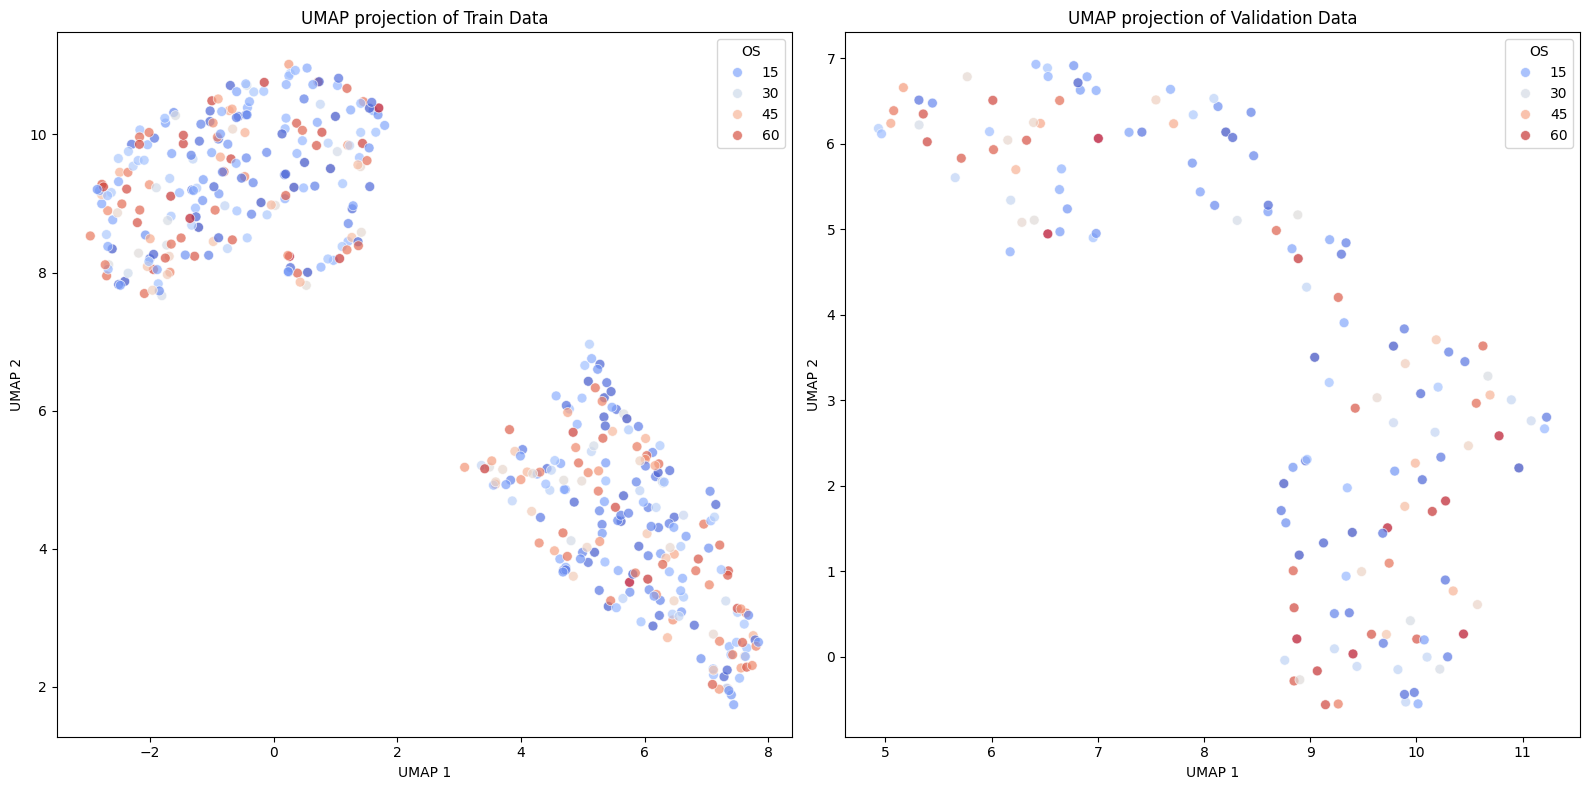

In [159]:
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# First subplot for training data
sns.scatterplot(
    x='UMAP_1', 
    y='UMAP_2', 
    hue=meta_data_color, 
    data=Z_train_umap, 
    palette='coolwarm',  # Or any other palette
    s=50,  # Adjust the size of the dots
    alpha=0.7,  # Transparency of the dots
    ax=axes[0]  # Specify the first subplot
)
axes[0].set_title('UMAP projection of Train Data')
axes[0].set_xlabel('UMAP 1')
axes[0].set_ylabel('UMAP 2')

# Second subplot for validation data
sns.scatterplot(
    x='UMAP_1', 
    y='UMAP_2', 
    hue=meta_data_color, 
    data=Z_val_umap, 
    palette='coolwarm',  # Or any other palette
    s=50,  # Adjust the size of the dots
    alpha=0.7,  # Transparency of the dots
    ax=axes[1]  # Specify the second subplot
)
axes[1].set_title('UMAP projection of Validation Data')
axes[1].set_xlabel('UMAP 1')
axes[1].set_ylabel('UMAP 2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [154]:


Z_train_pca = generate_pca_embedding(Z_train).iloc[:, :2]
Z_val_pca = generate_pca_embedding(Z_val).iloc[:,:2]

Z_train_pca.columns = ['PCA_1', 'PCA_2']
Z_val_pca.columns = ['PCA_1', 'PCA_2']

Z_train_pca = Z_train_pca.merge(y_data_train,left_index=True, right_index=True)
Z_val_pca = Z_val_pca.merge(y_data_val,left_index=True, right_index=True)

Z_train_pca.shape, Z_val_pca.shape

((443, 60), (149, 60))

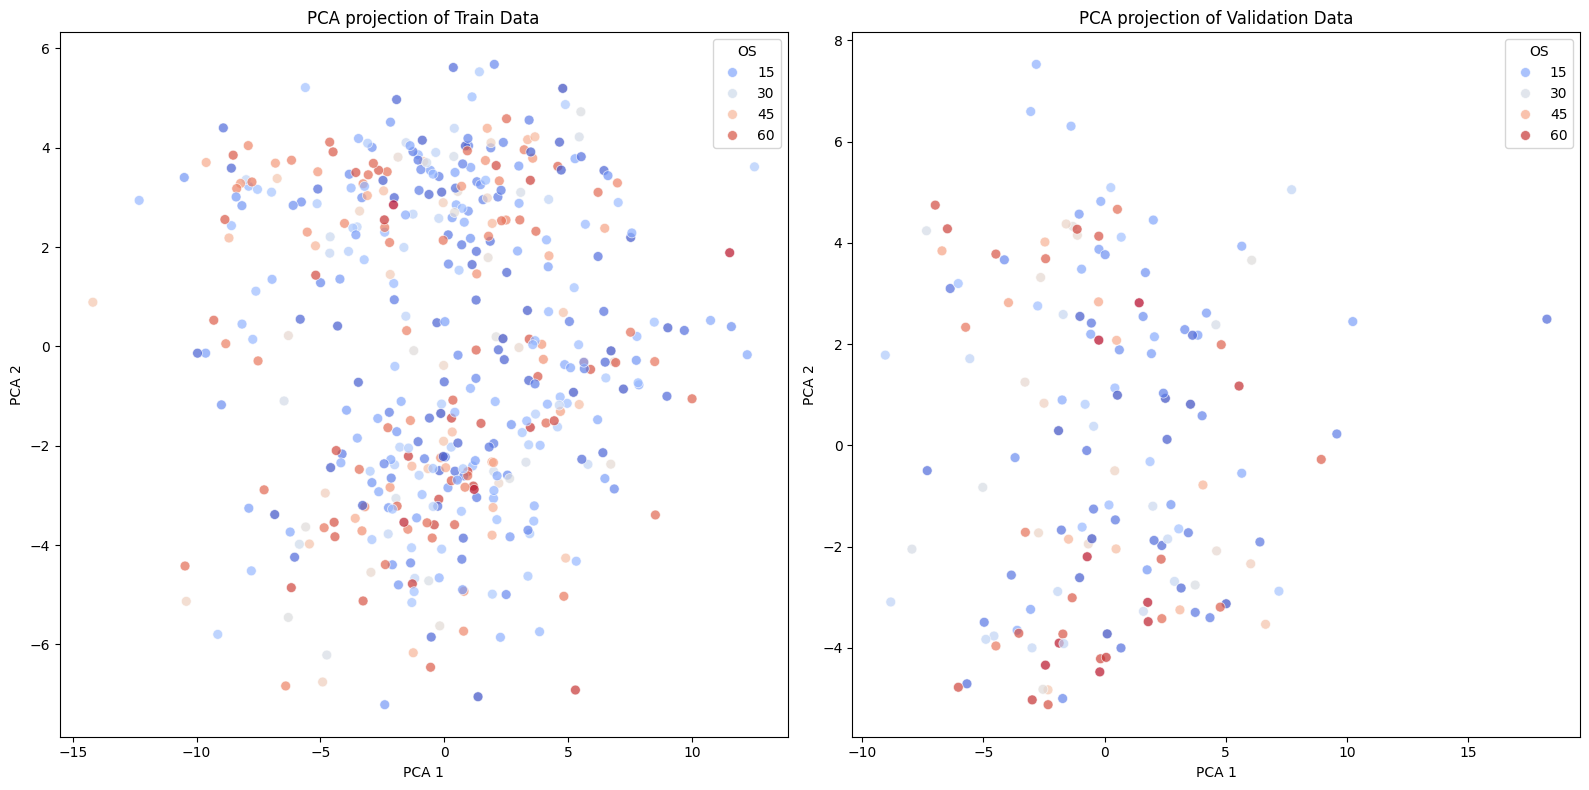

In [160]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# First subplot for training data
sns.scatterplot(
    x='PCA_1', 
    y='PCA_2', 
    hue=meta_data_color, 
    data=Z_train_pca, 
    palette='coolwarm',  # Or any other palette
    s=50,  # Adjust the size of the dots
    alpha=0.7,  # Transparency of the dots
    ax=axes[0]  # Specify the first subplot
)
axes[0].set_title('PCA projection of Train Data')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')

# Second subplot for validation data
sns.scatterplot(
    x='PCA_1', 
    y='PCA_2', 
    hue=meta_data_color, 
    data=Z_val_pca, 
    palette='coolwarm',  # Or any other palette
    s=50,  # Adjust the size of the dots
    alpha=0.7,  # Transparency of the dots
    ax=axes[1]  # Specify the second subplot
)
axes[1].set_title('PCA projection of Validation Data')
axes[1].set_xlabel('PCA 1')
axes[1].set_ylabel('PCA 2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### perfroming task predictions

In [177]:
import latent_task_predict_finetune
importlib.reload(latent_task_predict_finetune)
from latent_task_predict_finetune import log_reg_multi_class, ridge_regression_predict

task='Benefit BINARY'

# Drop rows with NaN values in the target columns
valid_train_indices = y_data_train[task].dropna().index
valid_val_indices = y_data_val[task].dropna().index

# Filter y to remove NaNs
y_train = y_data_train.loc[valid_train_indices, task]
y_val = y_data_val.loc[valid_val_indices, task]

# Encode Y labels
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)


#full input data
X_train_filtered = X_data_train.loc[valid_train_indices]
X_val_filtered = X_data_val.loc[valid_val_indices]

#latent space - fine tuned initiation
Z_train_filtered_real = Z_train_real.loc[valid_train_indices]
Z_val_filtered_real = Z_val_real.loc[valid_val_indices]

#latent space - rand initiation
Z_train_filtered_rand = Z_train_rand.loc[valid_train_indices]
Z_val_filtered_rand = Z_val_rand.loc[valid_val_indices]


# Train and evaluate the model - latent space
[best_model, val_accuracy_X] = log_reg_multi_class(X_train_filtered, y_train, X_val_filtered, y_val,)
[best_model, val_accuracy_Z_real] = log_reg_multi_class(Z_train_filtered_real, y_train, Z_val_filtered_real, y_val,)
[best_model, val_accuracy_Z_rand] = log_reg_multi_class(Z_train_filtered_rand, y_train, Z_val_filtered_rand, y_val,)


print(f'{task} Val Accuracy Input data: {val_accuracy_X:.4f}')
print(f'{task} Val Accuracy Latent space - fine tuned: {val_accuracy_Z_real:.9f}')
print(f'{task} Val Accuracy Latent space - randome initation: {val_accuracy_Z_rand:.9f}')


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Benefit BINARY Val Accuracy Input data: 0.6364
Benefit BINARY Val Accuracy Latent space - fine tuned: 0.613636364
Benefit BINARY Val Accuracy Latent space - randome initation: 0.613636364


/home/leilapirhaji/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:




# Now use the latnet space to predict the tasks
        
# Predict the categorical tasks
for task in task_list_cat:

    # Drop rows with NaN values in the target columns
    valid_train_indices = y_data_train[task].dropna().index
    valid_val_indices = y_data_val[task].dropna().index


    # Filter y and Z datasets to remove NaNs
    y_train = y_data_train.loc[valid_train_indices, task]
    y_val = y_data_val.loc[valid_val_indices, task]

    Z_train_filtered = Z_train.loc[valid_train_indices]
    Z_val_filtered = Z_val.loc[valid_val_indices]

    # Encode labels
    y_train = label_encoder.fit_transform(y_train)
    y_val = label_encoder.transform(y_val)

    # Train and evaluate the model
    [best_model, val_accuracy, test_accuracy] = log_reg_multi_class(Z_train_filtered, y_train, Z_val_filtered, y_val,)


    # Store the results in the dictionary
    model_results[f'{task} Val Accuracy'] = val_accuracy
    model_results[f'{task} Test Accuracy'] = test_accuracy

    print(f'{task} Val Accuracy: {val_accuracy:.4f}')
    print(f'{task} Test Accuracy: {test_accuracy:.4f}')


       
# Append the model results to the list of all results
all_results.append(model_results)



# Convert the all_results list to a Pandas DataFrame
final_results_df = pd.DataFrame(all_results)

# Save the DataFrame to a CSV file
final_results_df.to_csv(f'{pretrain_save_dir}/final_pretrain_latent_results.csv', index=False)









            

NEPTUNE_API_TOKEN	 WEBAPP_DB_LOC	 create_selected_data	 get_latest_dataset	 json	 neptune	 neptune_api_token	 np	 os	 
pd	 plt	 torch	 
